# DiffRenderGAN Training Demonstration

This notebook serves as a demonstration of the DiffRenderGAN training workflow.  
It guides through the setup, dataset preparation, and training configuration using data from **Rühle et al. (2021)**.
Please note the original experiments and training results presented in the paper are stored in the `experiments/` directory.  


Before running this notebook, please ensure that:

1. The **Conda environment** is properly configured and activated  
   (e.g., `conda activate diffrendergan`).  
2. **Weights & Biases (wandb)** is correctly set up with your account  
   to enable experiment tracking and logging.  
3. All dependencies are installed from `environment.yml`, and the  
   DiffRenderGAN repository is cloned and accessible in your working directory.


## Install

In [4]:
!git clone https://github.com/dpossart/DiffRenderGAN

Cloning into 'DiffRenderGAN'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 149 (delta 29), reused 148 (delta 28), pack-reused 0 (from 0)
Receiving objects: 100% (149/149), 58.23 MiB | 41.55 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [1]:
import os
os.chdir("DiffRenderGAN")

In [3]:
!conda env create -f environment.yml || echo "Environment already exists"
!conda activate diffrendergan


CondaValueError: prefix already exists: /home/dennis.possart/miniconda3/envs/ganpaper

Environment already exists


## Example Dataset by Rühle et al. (2021)

In [5]:
!mkdir -p temp && mkdir -p datasets/Ruehle_et_al && mkdir -p datasets/Ruehle_et_al_cropped 

In [6]:
!cd temp && git clone https://github.com/BAMresearch/automatic-sem-image-segmentation/

Cloning into 'automatic-sem-image-segmentation'...
remote: Enumerating objects: 817, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 817 (delta 20), reused 17 (delta 17), pack-reused 793 (from 1)
Receiving objects: 100% (817/817), 306.52 MiB | 39.31 MiB/s, done.
Resolving deltas: 100% (440/440), done.
Updating files: 100% (639/639), done.


Copy the images

In [7]:
!cp -r temp/automatic-sem-image-segmentation/Archive/Automatic_SEM_Image_Segmentation/Input_Images datasets/Ruehle_et_al

#### Optional: Reserve Real Images and Masks for Segmentation Evaluation

If you plan to train a segmentation model on your synthetic data and later test it on real microscopy images, it is advised to split a portion of your real images as a test set here. This only applies if your real data provides mask annotations. The respective images and masks should remain untouched during DiffRenderGAN training to allow for an unbiased evaluation of segmentation performances on real data.

Crop training images into target patch size patches

In [8]:
from utils.util import crop_and_save_patches
dataset_dir = 'datasets/Ruehle_et_al/Input_Images'
cropped_dir = 'datasets/Ruehle_et_al_cropped'
patch_size = 256
# Non-overlapping patches
step_size = 256
crop_and_save_patches(dataset_dir, cropped_dir, patch_size, step_size)

Select (manually) patches that contain at least *n* fully displayed instances/nanoparticles (here three). Optionally reserve empty background patches to supplement later a synthetic dataset

In [9]:
selected_cropped_imgs_list = [
    "1908248_patch_0_1.tif",
    "1908248_patch_0_2.tif",
    "1908248_patch_1_1.tif",
    "1908248_patch_1_2.tif",
    "1908250_patch_0_3.tif",
    "1908250_patch_1_2.tif",
    "1908252_patch_0_0.tif",
    "1908252_patch_0_2.tif",
    "1908252_patch_1_0.tif",
    "1908252_patch_1_1.tif",
    "1908252_patch_1_3.tif",
    "1908254_patch_0_0.tif",
    "1908254_patch_0_1.tif",
    "1908254_patch_0_2.tif",
    "1908254_patch_1_0.tif",
    "1908254_patch_1_1.tif",
    "1908256_patch_0_0.tif",
    "1908256_patch_0_2.tif",
    "1908256_patch_0_3.tif",
    "1908256_patch_1_0.tif",
    "1908256_patch_1_1.tif",
    "1908256_patch_1_2.tif",
    "1908256_patch_1_3.tif",
    "1908258_patch_0_2.tif",
    "1908258_patch_1_3.tif",
    "1908260_patch_0_0.tif",
    "1908260_patch_0_1.tif",
    "1908260_patch_1_2.tif",
    "1908262_patch_0_3.tif",
    "1908262_patch_1_0.tif",
    "1908262_patch_1_1.tif",
    "1908264_patch_1_1.tif",
    "1908264_patch_1_2.tif",
    "1908266_patch_1_0.tif",
    "1908266_patch_1_2.tif",
    "1908268_patch_0_1.tif",
    "1908268_patch_0_2.tif",
    "1908268_patch_0_3.tif",
    "1908268_patch_1_0.tif",
    "1908268_patch_1_1.tif",
    "1908268_patch_1_3.tif",
    "1908270_patch_1_0.tif",
    "1908270_patch_1_2.tif",
    "1908270_patch_1_3.tif",
    "1908272_patch_1_0.tif",
    "1908272_patch_1_1.tif",
    "1908274_patch_0_1.tif",
    "1908274_patch_0_2.tif",
    "1908274_patch_0_3.tif",
    "1908274_patch_1_0.tif",
    "1908274_patch_1_1.tif",
    "1908274_patch_1_2.tif",
    "1908274_patch_1_3.tif",
    "1908276_patch_0_2.tif",
    "1908276_patch_1_0.tif",
    "1908276_patch_1_1.tif",
    "1908276_patch_1_2.tif",
    "1908276_patch_1_3.tif",
    "1908278_patch_0_3.tif",
    "1908278_patch_1_0.tif",
    "1908278_patch_1_1.tif",
    "1908278_patch_1_2.tif",
    "1908280_patch_0_0.tif",
    "1908280_patch_0_1.tif",
    "1908280_patch_0_2.tif",
    "1908282_patch_0_0.tif",
    "1908282_patch_0_1.tif",
    "1908282_patch_0_2.tif",
    "1908282_patch_0_3.tif",
    "1908282_patch_1_1.tif",
    "1908282_patch_1_2.tif",
    "1908282_patch_1_3.tif",
    "1908284_patch_1_1.tif",
    "1908284_patch_1_2.tif",
    "1908286_patch_1_0.tif",
    "1908286_patch_1_1.tif",
    "1908286_patch_1_2.tif",
    "1908286_patch_1_3.tif",
    "1908288_patch_0_1.tif",
    "1908288_patch_0_2.tif",
    "1908288_patch_0_3.tif",
    "1908288_patch_1_1.tif",
    "1908290_patch_1_0.tif",
    "1908290_patch_1_1.tif",
    "1908290_patch_1_2.tif",
    "1908292_patch_0_0.tif",
    "1908292_patch_0_1.tif",
    "1908292_patch_0_2.tif",
    "1908292_patch_0_3.tif",
    "1908292_patch_1_0.tif",
    "1908292_patch_1_2.tif",
    "1908292_patch_1_3.tif",
    "1908294_patch_0_0.tif",
    "1908294_patch_1_0.tif",
    "1908294_patch_1_1.tif",
    "1908294_patch_1_2.tif",
    "1908294_patch_1_3.tif",
    "1908296_patch_0_0.tif",
    "1908296_patch_0_1.tif",
    "1908296_patch_0_2.tif",
    "1908296_patch_0_3.tif",
    "1908296_patch_1_0.tif",
    "1908296_patch_1_2.tif",
    "1908296_patch_1_3.tif",
    "1908298_patch_0_0.tif",
    "1908298_patch_0_1.tif",
    "1908298_patch_1_2.tif",
    "1908298_patch_1_3.tif",
    "1908300_patch_0_0.tif",
    "1908300_patch_1_1.tif",
    "1908300_patch_1_2.tif",
    "1908302_patch_0_2.tif",
    "1908302_patch_1_0.tif",
    "1908302_patch_1_1.tif",
    "1908302_patch_1_2.tif",
    "1908304_patch_0_0.tif",
    "1908304_patch_0_1.tif",
    "1908304_patch_0_3.tif",
    "1908304_patch_1_0.tif",
    "1908304_patch_1_3.tif",
    "1908306_patch_0_1.tif",
    "1908306_patch_0_2.tif",
    "1908306_patch_1_1.tif",
    "1908306_patch_1_2.tif",
    "1908308_patch_0_2.tif",
    "1908308_patch_1_3.tif",
    "1908310_patch_0_1.tif",
    "1908310_patch_0_3.tif",
    "1908310_patch_1_1.tif",
    "1908312_patch_0_1.tif",
    "1908312_patch_1_1.tif",
    "1908312_patch_1_2.tif",
    "1908312_patch_1_3.tif",
    "1908314_patch_0_3.tif",
    "1908314_patch_1_0.tif",
    "1908314_patch_1_1.tif",
    "1908314_patch_1_2.tif",
    "1908314_patch_1_3.tif",
    "1908316_patch_0_2.tif",
    "1908316_patch_1_0.tif",
    "1908316_patch_1_1.tif",
    "1908316_patch_1_2.tif",
    "1908318_patch_0_0.tif",
    "1908318_patch_0_1.tif",
    "1908318_patch_0_2.tif",
    "1908318_patch_0_3.tif",
    "1908318_patch_1_0.tif",
    "1908318_patch_1_1.tif",
    "1908318_patch_1_2.tif",
    "1908318_patch_1_3.tif",
    "1908320_patch_0_1.tif",
    "1908320_patch_0_2.tif",
    "1908320_patch_0_3.tif",
    "1908320_patch_1_0.tif",
    "1908320_patch_1_1.tif",
    "1908320_patch_1_2.tif",
    "1908322_patch_0_2.tif",
    "1908322_patch_1_1.tif",
    "1908322_patch_1_2.tif",
    "1908324_patch_0_0.tif",
    "1908324_patch_0_1.tif",
    "1908324_patch_0_3.tif",
    "1908324_patch_1_0.tif",
    "1908324_patch_1_1.tif",
    "1908324_patch_1_2.tif",
    "1908324_patch_1_3.tif",
    "1908326_patch_0_0.tif",
    "1908326_patch_0_1.tif",
    "1908326_patch_0_2.tif",
    "1908326_patch_0_3.tif",
    "1908326_patch_1_0.tif",
    "1908326_patch_1_1.tif",
    "1908326_patch_1_2.tif",
    "1908326_patch_1_3.tif",
]

Move selected patches to a train directory

In [10]:
import os, shutil

train_dir = os.path.join(cropped_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

for f in selected_cropped_imgs_list:
    src = os.path.join(cropped_dir, f)  
    if os.path.isfile(src):
        shutil.move(src, os.path.join(train_dir, os.path.basename(f)))

print(f"Moved {len(selected_cropped_imgs_list)} files to {train_dir}")

Moved 174 files to datasets/Ruehle_et_al_cropped/train


## Training
Here we configure the DiffRenderGAN model with our TiO₂ meshes (`--mesh_path`)
and the cropped Ruehle et al. dataset (`--dataset_path`).

We use 40 meshes that are distributed across the scene.
Not all meshes need to be visible in each rendered image.
Users can adjust the maximum number of active meshes
by adding or removing mesh files in the directory specified by `--mesh_path`.

To encourage realistic structure formation, we aim for particles to appear more clustered,
forming up to five observable agglomerates (`--mesh_max_agglomerates=5`).

For spatial arrangement, we apply a Poisson disk–based distribution (`--poisson_placement`)
instead of a purely random placement.
This ensures local clustering while maintaining controlled inter-particle distances.

The mesh unit parameter (`--mesh_unit`) regulates the degree of overlap or spacing
between meshes.
The chosen value is matched to the exported mesh scale and its realistic appearance
in the rendered synthetic images.

All material and rendering parameters marked with `-1`
(e.g., `--p_base_color=-1`, `--p_roughness=-1`, `--p_sheen_tint=-1`, `--p_spec_tint=-1`)
are learnable and optimized during training.

The nanoparticle size (diameter) distribution** is set to lognormal
(`--lognormal 0.1 2.0`), reflecting experimentally observed variability.

Finally, clipping values
(`--particle_bsdf_limit "-0.1, 0.5"`, `--stage_bsdf_limit "0.01, 0.4"`,
`--noise_limit "0.001, 0.1"`) define the valid parameter ranges,
ensuring stable and physically consistent optimization.

In [18]:
TAG="Ruehle2021TiO2_DEMO"
MESH_PATH="utils/rendering/meshes/TiO2_2"
DATASET_PATH="datasets/Ruehle_et_al_cropped/train"
WANDB_TAG="DiffRenderGAN_Ruehle_Demo"

!python train_gan.py \
    --tag="$TAG" \
    --wandb_tag="$WANDB_TAG" \
    --mesh_path="$MESH_PATH" \
    --mesh_scale=1.0 \
    --emission1=1. \
    --emission2=0.1 \
    --dataset_path="$DATASET_PATH" \
    --spp=121 \
    --gaussdev=0.5 \
    --mesh_unit=0.25 \
    --n_epochs=50 \
    --mesh_max_agglomerates=5 \
    --p_sheen=-1 \
    --p_base_color=-1 \
    --p_roughness=-1 \
    --p_sheen_tint=-1 \
    --p_spec_tint=-1 \
    --s_base_color=-1 \
    --s_roughness=0.5 \
    --s_specular=0.0 \
    --mesh_base_sample_limit=2.5 \
    --poisson_placement \
    --lognormal 0.1 0.2 \
    --particle_bsdf_limit=".01,5." \
    --stage_bsdf_limit="0.01, 0.4" \
    --noise_limit="0.001, 0.1"

2025-11-11 15:39:08 WARN  wrk3  [HDRFilm] Monochrome mode enabled, setting film output pixel format to 'luminance' (was rgb).
wandb: Currently logged in as: dennis-possart (im45unaj). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.22.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.1
wandb: Run data is saved locally in /home/dennis.possart/temp/diffrendergan/notebooks/DiffRenderGAN/wandb/run-20251111_153910-8y5xcioa
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run dandy-paper-4
wandb: ⭐️ View project at https://wandb.ai/im45unaj/DiffRenderGAN_Ruehle_Demo
wandb: 🚀 View run at https://wandb.ai/im45unaj/DiffRenderGAN_Ruehle_Demo/runs/8y5xcioa
tag: Ruehle2021TiO2_DEMO
wandb_tag: DiffRenderGAN_Ruehle_Demo
mesh_path: utils/rendering/meshes/TiO2_2
mesh_unit: 0.25
mesh_base_sample_limit: 2.5
mesh_scale: 1.0
bimodal: None
gaussian: None
lognormal: [0.1, 0.2]
mesh_position3d: False
me

## After Training

Once training is complete, the learned scene parameter distributions
and the FID score across epochs are logged in the Wandb dashboard.

These logs provide insight into how the generator balances visual realism and parameter diversity.
To determine the best training epoch, we compare the later epochs with the lowest FID values.

However, instead of blindly selecting the absolute minimum FID,
we manually choose the epoch that shows both a low FID score and a broad, diverse parameter distribution.
This helps to avoid selecting a potentially mode-collapsed epoch that yields low FID
but fails to capture the full variability of realistic particle and material configurations.

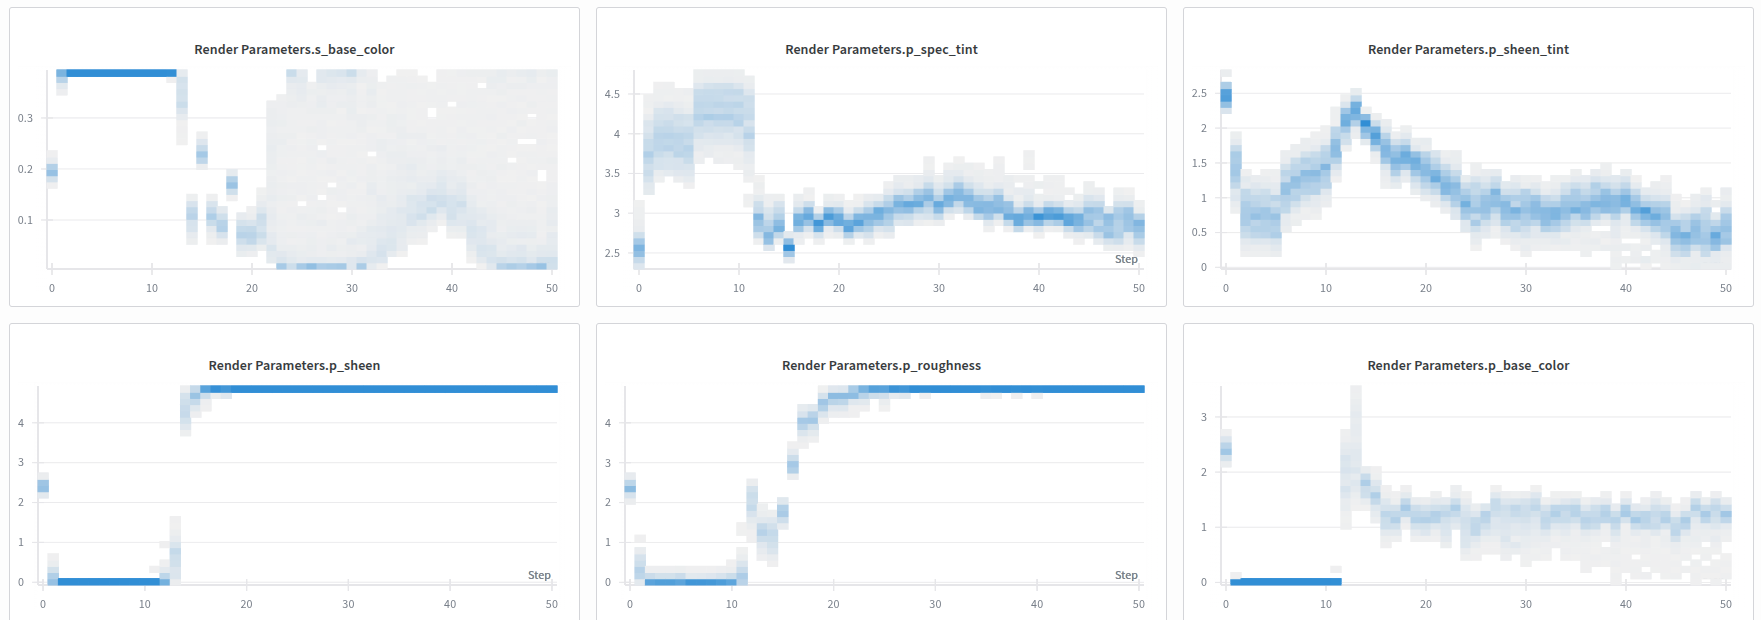

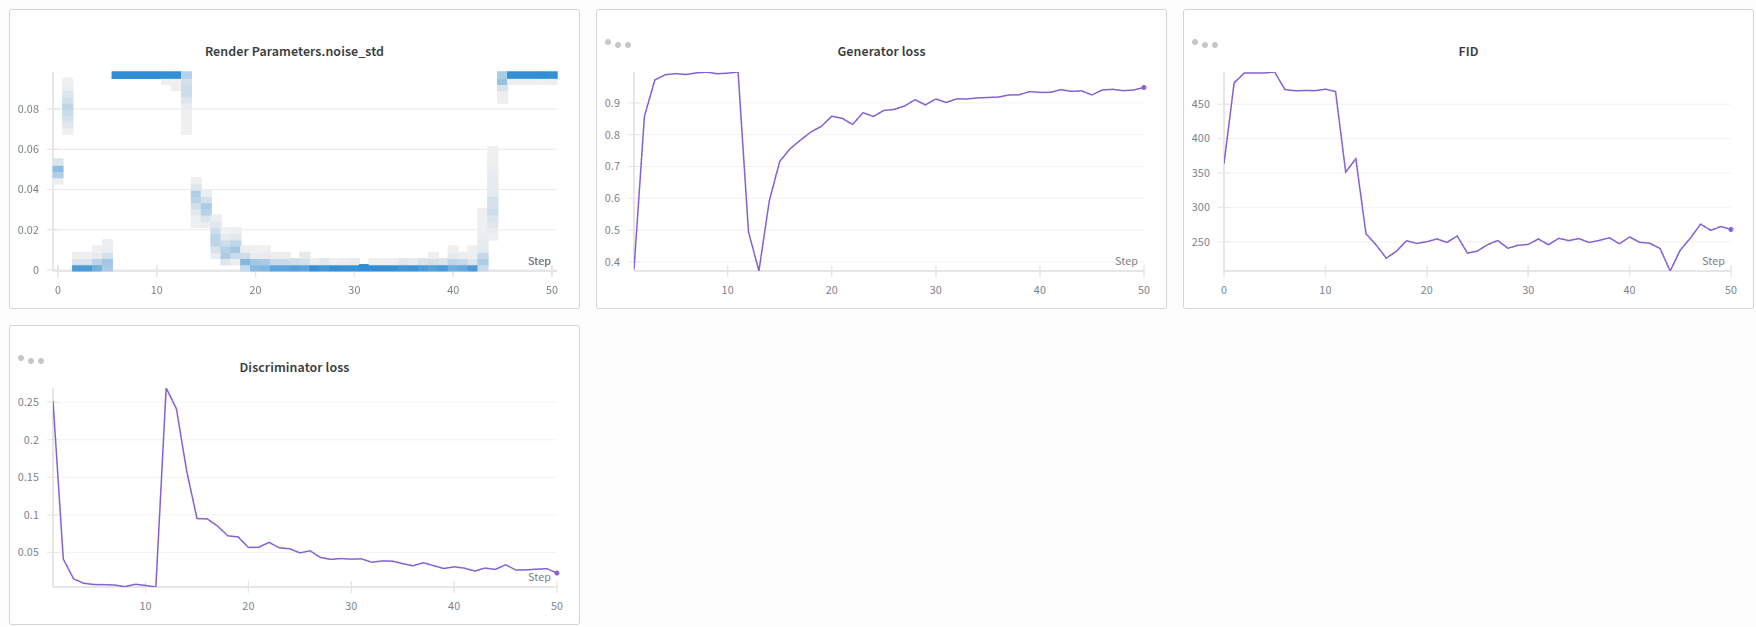

In [3]:
from IPython.display import Image, display


img1 = "../notebook_res/wandb_logs1.png"
img2 = "../notebook_res/wandb_logs2.png"

display(Image(filename=img1))
display(Image(filename=img2))

## Visualization of Training Results

After selecting the best model checkpoint, we can visualize a few representative
outputs to qualitatively assess the realism 

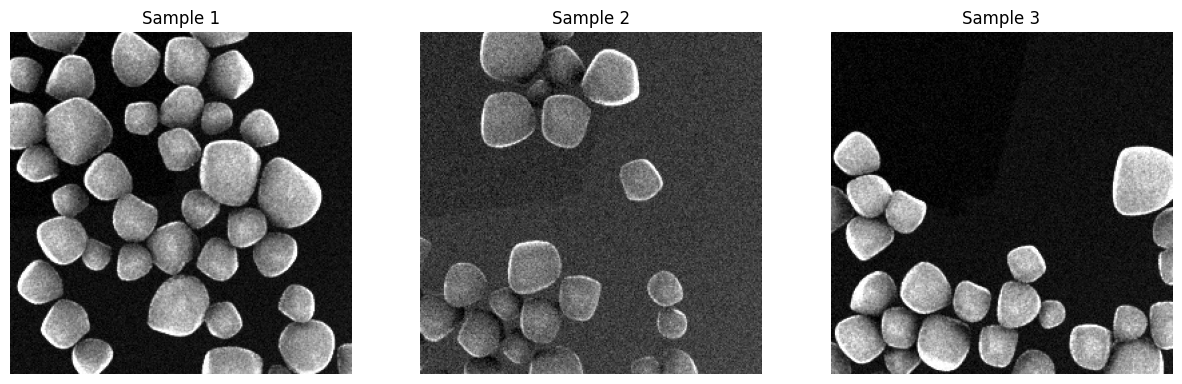

In [23]:
import random
import matplotlib.pyplot as plt
import tifffile as tiff
import numpy as np
from pathlib import Path
from PIL import Image


best_epoch = 43 

# Path to generated images
result_dir = Path(f"experiments/Ruehle2021TiO2_DEMO/output/{best_epoch}")

# Select three random images from the directory
sample_files = random.sample(list(result_dir.glob("*.tif")), 3)

# Display images
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(sample_files, 1):
    img = tiff.imread(img_path)
    img = np.squeeze(img)
    plt.subplot(1, 3, i)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(f"Sample {i}")
plt.show()

## Next Steps: Mask Generation and Synthetic Dataset Creation

After verifying the visual quality of the generated scenes,
the next stage involves mask generation and synthetic dataset creation. Please continue with **`test_diffrendergan.ipynb`**, 